I have run this notebook on Kaggle using GPU P100 as Accerlerator

# Ungraded Lab: Data Augmentation


## Setting up environment in Kaggle

In [2]:
!python3 -m venv venv

In [13]:
!source ./venv/bin/activate

In [10]:
# !./venv/bin/pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 52.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [14]:
!python --version

Python 3.10.13


In [15]:
!python3 -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2


In [18]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


## Baseline Performance

In [19]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip -O "./venv/zipfile.zip"

--2024-07-26 07:52:48--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: './venv/zipfile.zip'

./venv/zipfile.zip  100%[===================>]  65.43M   145MB/s    in 0.5s    

2024-07-26 07:52:48 (145 MB/s) - './venv/zipfile.zip' saved [68606236/68606236]



In [20]:
import os
import zipfile

# Extract the archive
zip_file = './venv/zipfile.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall('./venv/')
zip_ref.close()

# Assign training and validation directories
base_dir = './venv/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [21]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

2024-07-26 07:54:33.827380: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-26 07:54:33.827484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-26 07:54:33.973913: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [24]:
tf.__version__

'2.15.0'

In [25]:
def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20


I0000 00:00:1721980592.706160     432 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 - 9s - loss: 0.6833 - accuracy: 0.5605 - val_loss: 0.6701 - val_accuracy: 0.5800 - 9s/epoch - 90ms/step
Epoch 2/20
100/100 - 4s - loss: 0.6555 - accuracy: 0.6125 - val_loss: 0.6342 - val_accuracy: 0.6450 - 4s/epoch - 42ms/step
Epoch 3/20
100/100 - 4s - loss: 0.6120 - accuracy: 0.6710 - val_loss: 0.6163 - val_accuracy: 0.6660 - 4s/epoch - 44ms/step
Epoch 4/20
100/100 - 4s - loss: 0.5670 - accuracy: 0.6985 - val_loss: 0.5864 - val_accuracy: 0.6800 - 4s/epoch - 42ms/step
Epoch 5/20
100/100 - 4s - loss: 0.5489 - accuracy: 0.7195 - val_loss: 0.5904 - val_accuracy: 0.6930 - 4s/epoch - 42ms/step
Epoch 6/20
100/100 - 4s - loss: 0.5276 - accuracy: 0.7245 - val_loss: 0.5641 - val_accuracy: 0.7180 - 4s/epoch - 41ms/step
Epoch 7/20
100/100 - 4s - loss: 0.5031 - accuracy: 0.7520 - val_loss: 0.5630 - val_accuracy: 0.7090 - 4s/epoch - 43ms/step
Epoch 8/20
100/100 - 4s - loss: 0.4867 - accuracy: 0.7700 - val_loss: 0.5597 - val_accuracy: 0.7130 - 4s/epoch - 41ms/step
Epoch 9/20
100/100 - 4s - l

In [28]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

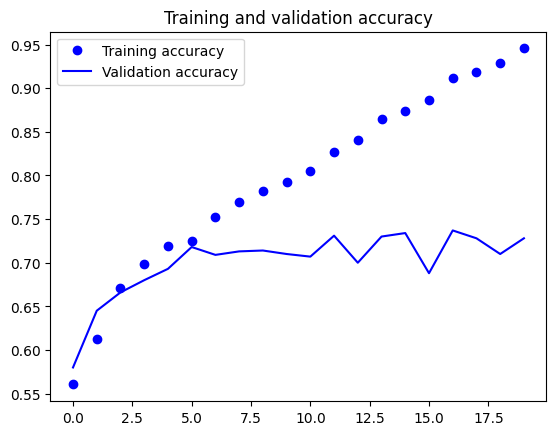

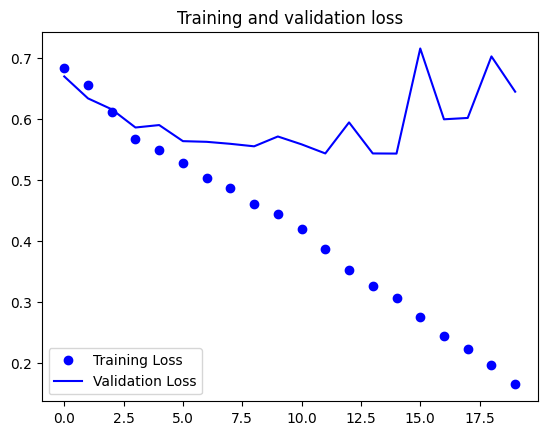

In [29]:
# Plot training results
plot_loss_acc(history)

## Data augmentation

In [30]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 16s - loss: 0.7093 - accuracy: 0.5215 - val_loss: 0.6833 - val_accuracy: 0.5310 - 16s/epoch - 163ms/step
Epoch 2/20
100/100 - 15s - loss: 0.6808 - accuracy: 0.5595 - val_loss: 0.6757 - val_accuracy: 0.5230 - 15s/epoch - 150ms/step
Epoch 3/20
100/100 - 15s - loss: 0.6732 - accuracy: 0.5620 - val_loss: 0.6846 - val_accuracy: 0.5530 - 15s/epoch - 152ms/step
Epoch 4/20
100/100 - 15s - loss: 0.6644 - accuracy: 0.6060 - val_loss: 0.6308 - val_accuracy: 0.6620 - 15s/epoch - 151ms/step
Epoch 5/20
100/100 - 15s - loss: 0.6504 - accuracy: 0.6080 - val_loss: 0.6187 - val_accuracy: 0.6570 - 15s/epoch - 153ms/step
Epoch 6/20
100/100 - 15s - loss: 0.6441 - accuracy: 0.6255 - val_loss: 0.6137 - val_accuracy: 0.6570 - 15s/epoch - 154ms/step
Epoch 7/20
100/100 - 16s - loss: 0.6421 - accuracy: 0.6155 - val_loss: 0.6006 - val_accuracy: 0.7050 - 16s/epoch - 159ms/step
Epoch 8/20
100/100 - 16s - loss: 0

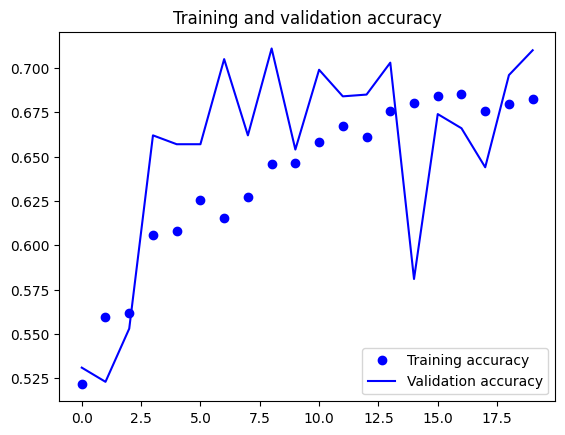

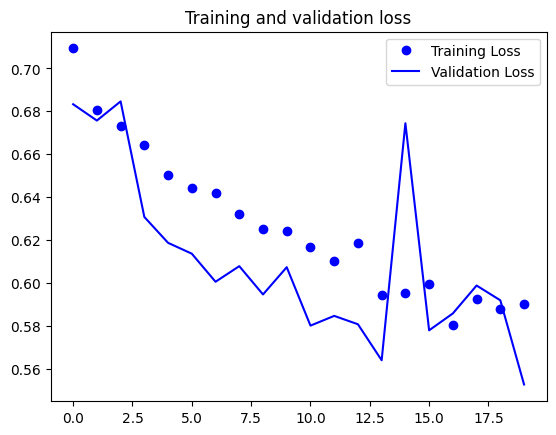

In [31]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)